# PROJECT PART 2

### 0 - imports

In [8]:
import os
import re

### 1 - plot A

In [54]:
# 0 - find real time
pattern = re.compile(r'real\s+(\d+m\d+\.\d+s)')

data = {}
# 1 - loop over each folder
for folder in sorted(os.listdir('./2a_data')):
    folder_path = os.path.join('./2a_data', folder)
    if os.path.isdir(folder_path):
        timings = []
        # 2 - loop over each file
        for filename in sorted(os.listdir(folder_path)):
            filepath = os.path.join(folder_path, filename)
            with open(filepath, 'r') as file:
                for line in file:
                    # 3 - find 'real'
                    match = pattern.search(line)
                    if match:
                        t = match.group(1)[:-1]
                        m, s = map(float, t.split('m'))
                        tot_s = m * 60 + s
                        timings.append(tot_s)
                        break
        # 4 - normalize
        normalized_timings = [round(tm / timings[-1], 2) for tm in timings]
        data[folder] = normalized_timings
data

{'blacksholes': [1.3, 1.29, 1.56, 1.3, 1.5, 1.34, 1.0],
 'canneal': [1.07, 1.22, 1.32, 1.21, 2.0, 1.25, 1.0],
 'dedup': [1.93, 1.37, 2.09, 1.38, 2.3, 1.73, 1.0],
 'ferret': [1.89, 1.04, 2.23, 1.03, 2.86, 1.92, 1.0],
 'freqmine': [1.98, 1.06, 2.02, 1.03, 1.95, 1.59, 1.0],
 'radix': [1.05, 1.11, 1.1, 1.08, 1.64, 1.08, 1.0],
 'vips': [1.77, 1.69, 1.81, 1.68, 1.98, 1.65, 1.0]}

### 2 - plot B

In [64]:
# 0 - find real time
pattern = re.compile(r'real\s+(\d+m\d+\.\d+s)')

data = {}
# 1 - loop over each folder
for folder in sorted(os.listdir('./2b_data')):
    folder_path = os.path.join('./2b_data', folder)
    if os.path.isdir(folder_path):
        timings = []
        # 2 - loop over each file
        for filename in sorted(os.listdir(folder_path)):
            filepath = os.path.join(folder_path, filename)
            with open(filepath, 'r') as file:
                for line in file:
                    # 3 - find 'real'
                    match = pattern.search(line)
                    if match:
                        t = match.group(1)[:-1]
                        m, s = map(float, t.split('m'))
                        tot_s = m * 60 + s
                        timings.append(tot_s)
                        break
        # 4 - normalize
        normalized_timings = [round(timings[0]/tm, 2) for tm in timings]
        data[folder] = normalized_timings
data


{'blacksholes': [1.0, 1.23, 2.65, 3.4],
 'canneal': [1.0, 1.48, 2.19, 2.79],
 'dedup': [1.0, 1.69, 2.18, 2.22],
 'ferret': [1.0, 1.97, 3.42, 3.99],
 'freqmine': [1.0, 1.82, 3.89, 4.83],
 'radix': [1.0, 1.79, 3.61, 5.47],
 'vips': [1.0, 2.0, 3.81, 4.38]}

AttributeError: 'Text' object has no property 'pad'

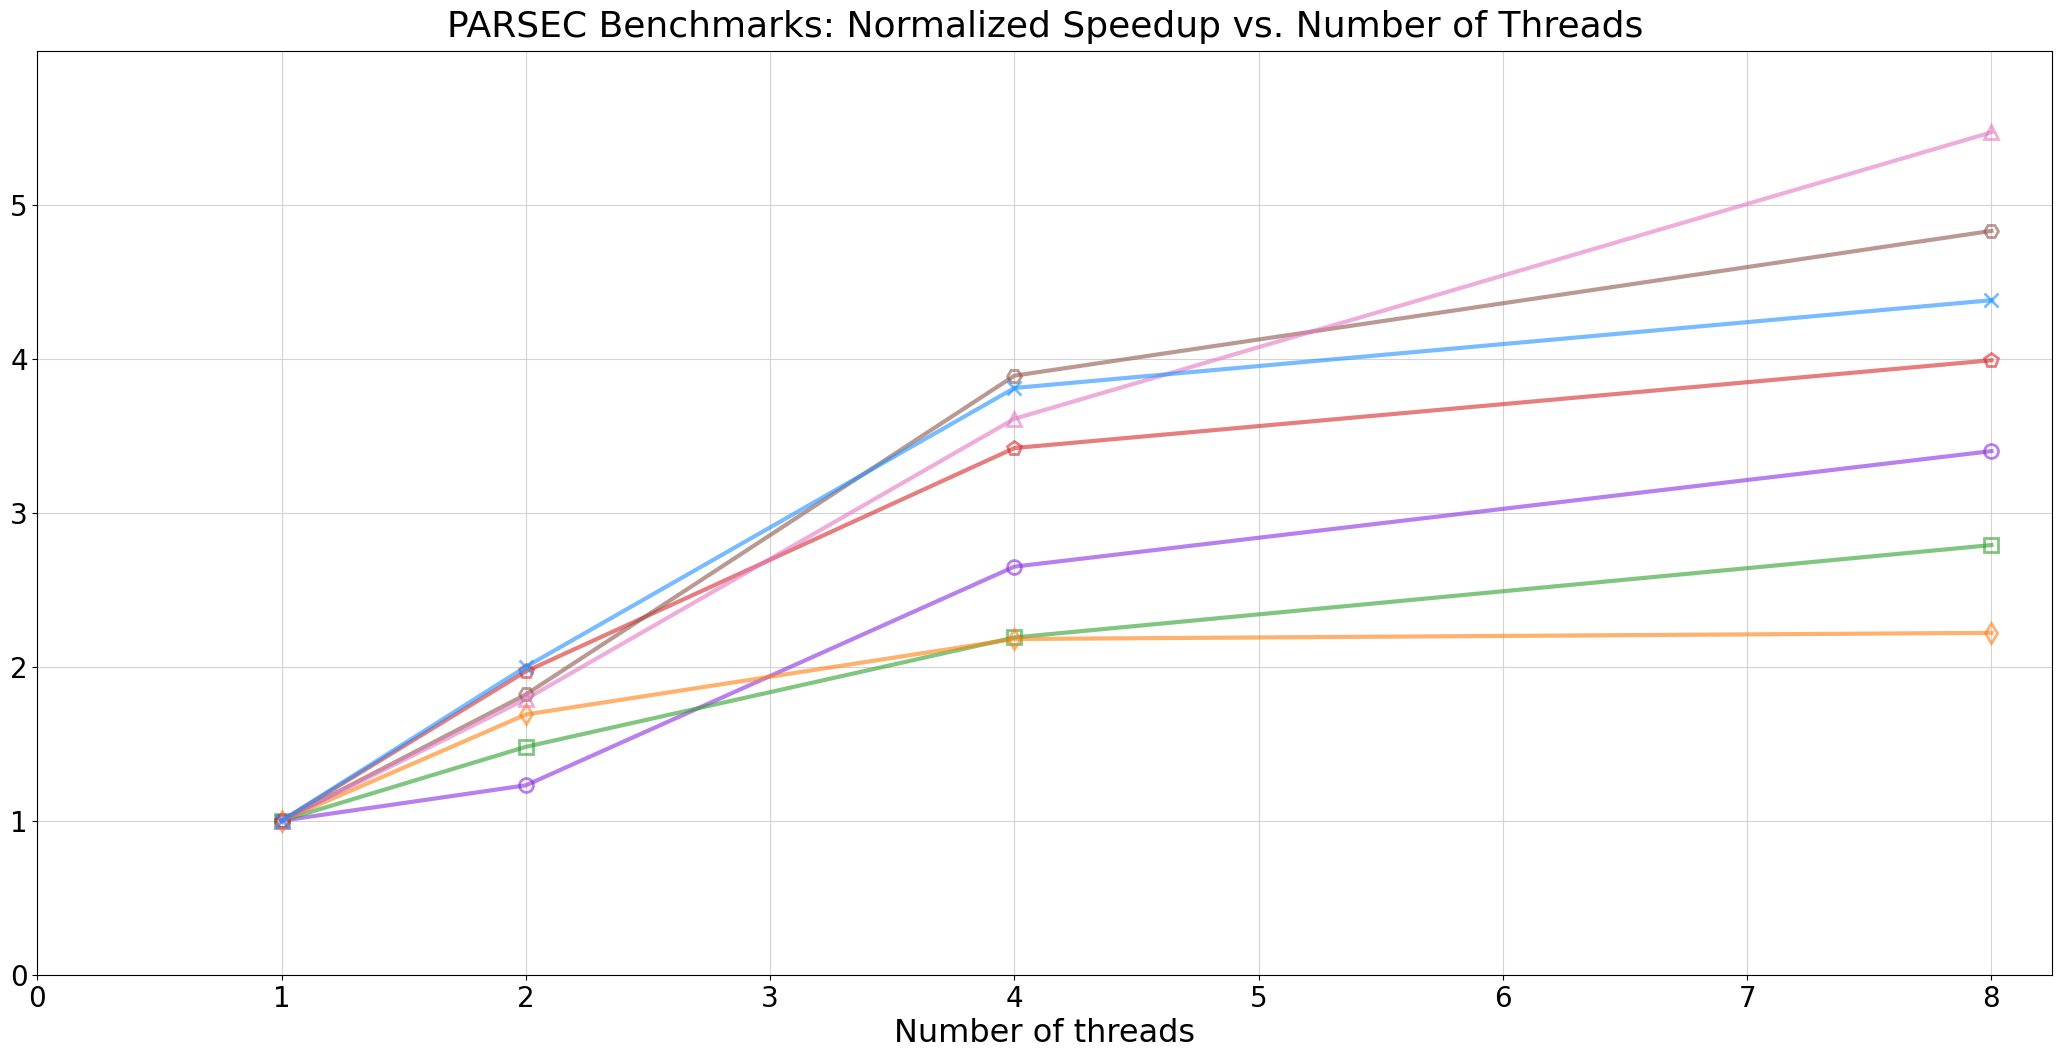

In [131]:

import seaborn as sb
import pandas as pn
import matplotlib.pyplot as plt
import os
import numpy as np


# 0 - find real time
pattern = re.compile(r'real\s+(\d+m\d+\.\d+s)')

data = {}
# 1 - loop over each folder
for folder in sorted(os.listdir('./2b_data')):
    folder_path = os.path.join('./2b_data', folder)
    if os.path.isdir(folder_path):
        timings = []
        # 2 - loop over each file
        for filename in sorted(os.listdir(folder_path)):
            filepath = os.path.join(folder_path, filename)
            with open(filepath, 'r') as file:
                for line in file:
                    # 3 - find 'real'
                    match = pattern.search(line)
                    if match:
                        t = match.group(1)[:-1]
                        m, s = map(float, t.split('m'))
                        tot_s = m * 60 + s
                        timings.append(tot_s)
                        break
        # 4 - normalize
        normalized_timings = [round(timings[0]/tm, 2) for tm in timings]
        data[folder] = normalized_timings

data
threads = [1,2,4,8]
plt.figure(figsize=(26, 12))
plt.title("PARSEC Benchmarks: Normalized Speedup vs. Number of Threads",fontsize=26, pad=10)
ylabels=['0','1', '2', '3', '4', '5']
plt.yticks(range(0,6,1), ylabels,fontsize=20)
xlabels=['0','1', '2', '3', '4', '5', '6','7','8']
plt.xticks(range(0,9,1), xlabels, fontsize=20)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
config = [(threads,data['blacksholes'], 'blacksholes', 'blueviolet','o'),
          (threads,data['canneal'], 'canneal', colors[2],'s'),
          (threads,data['dedup'], 'dedup', colors[1], 'd'),
          (threads,data['ferret'], 'ferret',colors[3],'p'),
          (threads,data['freqmine'], 'freqmine', colors[5],'H'),
          (threads,data['radix'], 'radix', colors[6], '^'),
          (threads,data['vips'], 'vips', 'dodgerblue', 'x')]

for dx, dy, name, c,m in config:
    plt.errorbar(x=dx, y=dy, alpha=0.6, label=name, marker=m, linewidth=3, markeredgewidth=2, markerfacecolor='none',markersize=10, color = c,)
plt.grid(True, color='lightgray')
plt.xlim(0, 8.25)
plt.ylim(0, 6)
plt.xlabel('Number of threads', fontsize=23, pad=10)
plt.ylabel('Speedup normalized to one thread', fontsize=23, pad=10)
plt.legend(title='benchmarks',fontsize=21, title_fontsize=23)
plt.show()



In [85]:
data

{'blacksholes': [125.125, 102.08, 47.194, 36.831],
 'canneal': [238.846, 161.61, 109.005, 85.589],
 'dedup': [20.349, 12.025, 9.326, 9.158],
 'ferret': [319.084, 162.059, 93.219, 79.944],
 'freqmine': [494.093, 271.752, 127.171, 102.314],
 'radix': [52.98, 29.635, 14.69, 9.684],
 'vips': [102.24799999999999, 51.071, 26.808, 23.329]}